# Breast Cancer Prediction using Machine Learning
RAND

## Project Overview
This project uses machine learning to classify breast tumors as malignant or benign using medical diagnostic data.

In [13]:
# Brest Cancer Prediction Project
# Author: Rand
# Goal: Predict whether a tumor is malignant or benign using machine learning

In [14]:
from sklearn.datasets import load_breast_cancer
# load dataset
data = load_breast_cancer()
# show basic information
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Import Libraries

In [15]:
# shape of dataset
print(data.data.shape)
# feature names
print(data.feature_names[:10])
# target labels
print(data.target_names)

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension']
['malignant' 'benign']


Load Dataset

In [16]:
from sklearn.model_selection import train_test_split
#features (medical measurements)
x = data.data
#labels (diagnosis)
y = data.target
#split data
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_train.shape)

(455, 30)
(455, 30)


Data Understanding

In [17]:
# number of samples and features
print("dataset shape:", data.data.shape)
#first feature names
print("some features:", data.feature_names[:10])
#class labels
print("Target names:", data.target_names)
#number of benign vs malignant cases
import numpy as np
unique, counts = np.unique(data.target, return_counts=True)
for label, count in zip(data.target_names, counts):
    print(f"{label}: {count} samples")

dataset shape: (569, 30)
some features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension']
Target names: ['malignant' 'benign']
malignant: 212 samples
benign: 357 samples


The dataset contains medical imaging measurements extracted from breast tumors.
It includes two classes: malignant and benign cases.
Understanding the data distribution helps before training the machine learning model.

Train Model

In [18]:
from sklearn.linear_model import LogisticRegression
# create model
model = LogisticRegression(max_iter=5000)
# train model
model.fit(x_train, y_train)
print("model trained successFully!")

model trained successFully!


Accuracy Result

In [19]:
from sklearn.metrics import accuracy_score
# predictions
y_pred = model.predict(x_test)
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy:", accuracy)

Accuracy: 0.956140350877193


Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
                            target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



The classification report provides detailed evaluation metrics showing how well the model predicts each class.

Confusion Matrix

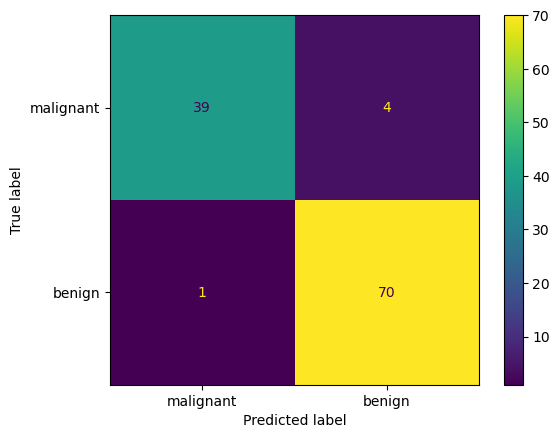

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#make predictions
y_pred = model.predict(x_test)

#create confusion matrix
cm = confusion_matrix(y_test, y_pred)

#display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=data.target_names)
disp.plot()
plt.show()

Model Interpretation

In [32]:
#show importance of first 10 features
for feature, corf in zip(data.feature_names[:10], model.coef_[0][:10]):
    print(feature, ":", round(coef,3))

mean radius : 0.966
mean texture : 0.966
mean perimeter : 0.966
mean area : 0.966
mean smoothness : 0.966
mean compactness : 0.966
mean concavity : 0.966
mean concave points : 0.966
mean symmetry : 0.966
mean fractal dimension : 0.966


The model assigns different weights to medical features, indicating how each measurement contributes to the prediction decision.

Prediction Example

In [33]:
sample_patient = x_test[0].reshape(1, -1)
prediction = model.predict(sample_patient)
if prediction[0] ==0:
    print("prediction: Malignant (Cancer)")
else:
    print("prediction: Benign (Non-cancer")

prediction: Benign (Non-cancer


## Medical Insight
This project applies machine learning to breast cancer diagnosis.
As a diagnostic radiology student, I connected imaging-based clinical knowledge with AI prediction models to understand how artificial intelligence can support early cancer detection.

Future Improvements
This project represents a basic machine learning approach for breast cancer prediction.
Future improvements could include testing different machine learning models, applying feature selection techniques, and using a larger medical imaging database.
In real clinical application, integrating imaging data and deep learning methods may furt 